# Lab 7.2: Нейронні мережі в розпізнаванні образів. Частина 1
### Шевченко Юлія, ФІ-31мн

In this homework, we are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The goal of this homework is to go through the steps described below and to implement the necessary code.

In the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [1]:
# All the imports for the task
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Step 1: Downloaded dataset and unzipped it
# Visit the link: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

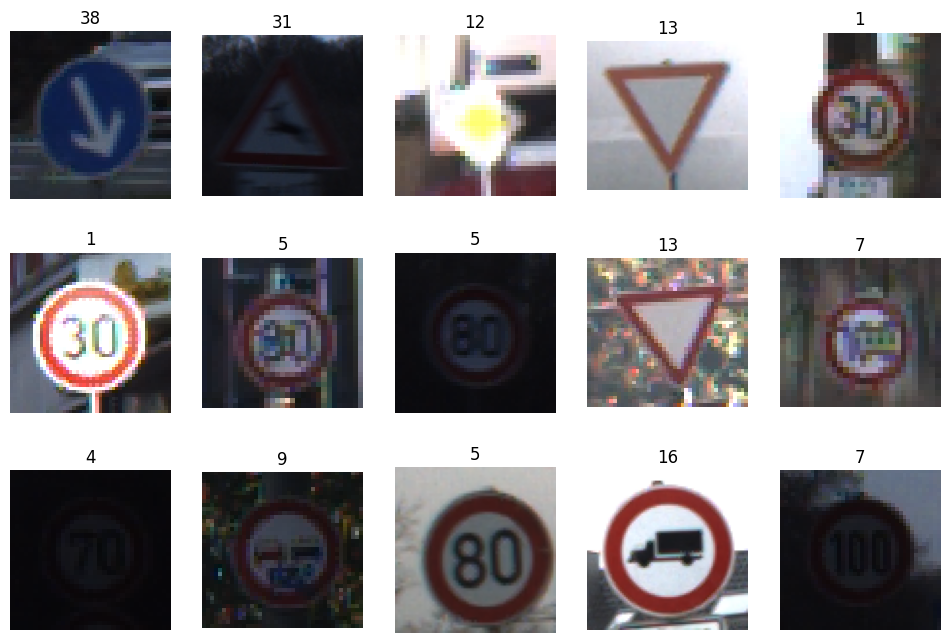

In [3]:
# Step 2: Load the training labels
root = '../Lab_7/gtsrb'  # Path to the dataset location
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples
num_samples = len(data)

# Show random data samples
plt.figure(figsize=(12, 8))
for image_index in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3, 5, image_index + 1)
    plt.imshow(img)
    plt.title(data.iloc[idx]['ClassId'])
    plt.axis('off')
plt.show()

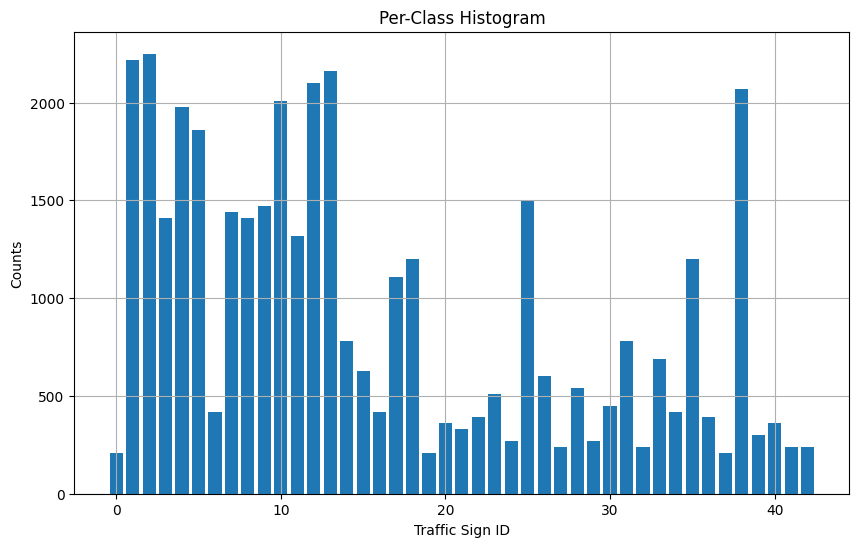

In [4]:
# Step 3: Inspect the dataset by computing and plotting the per-class histogram
# Extract class identifiers
ids = data['ClassId']

# Compute the per-class histogram
hist = Counter(ids)

plt.figure(figsize=(10, 6))
plt.bar(hist.keys(), hist.values())
plt.grid(True)
plt.xlabel('Traffic Sign ID')
plt.ylabel('Counts')
plt.title('Per-Class Histogram')
plt.show()

## Questions

#### Question 1: Do you consider the dataset to be balanced? If so, why? If not, why?

The balance of a dataset refers to the distribution of samples across different classes. A balanced dataset typically has roughly equal numbers of samples for each class, while an imbalanced dataset has significantly different numbers of samples across classes.

To determine if the GTSDB dataset is balanced, we can examine the per-class histogram plotted in Step 3. If the histogram shows roughly equal heights for each bar (representing each class), then the dataset can be considered balanced. However, if there are significant differences in the heights of the bars, the dataset may be imbalanced.

Based on the per-class histogram plotted from the GTSDB dataset, it appears that the dataset is not balanced. This is because the heights of the bars representing different traffic sign classes vary significantly. Some classes have a much higher number of samples compared to others, indicating an imbalance in the dataset. Therefore, the dataset cannot be considered balanced.

#### Question 2: Are there any classes that are (significantly) over-represented or under-represented?

Identifying over-represented or under-represented classes is essential for understanding the dataset's biases and potential limitations. Over-represented classes have a disproportionately high number of samples, while under-represented classes have too few samples compared to other classes.

Yes, there are classes that are significantly over-represented or under-represented in the GTSDB dataset. This can be observed from the per-class histogram. Classes with taller bars are over-represented, while those with shorter bars are under-represented.

For example, we can give TOP-3 over-represented and TOP-3 under-represented classes:
- Class 2: 2250 values
- Class 1: 2220 values
- Class 13: 2160 values
- ...
- Class 0: 210 values
- Class 19: 210 values
- Class 37: 210 values

In [5]:
print(hist)

Counter({2: 2250, 1: 2220, 13: 2160, 12: 2100, 38: 2070, 10: 2010, 4: 1980, 5: 1860, 25: 1500, 9: 1470, 7: 1440, 3: 1410, 8: 1410, 11: 1320, 18: 1200, 35: 1200, 17: 1110, 14: 780, 31: 780, 33: 689, 15: 630, 26: 600, 28: 540, 23: 510, 30: 450, 6: 420, 16: 420, 34: 420, 22: 390, 36: 390, 20: 360, 40: 360, 21: 330, 39: 300, 24: 270, 29: 270, 27: 240, 32: 240, 41: 240, 42: 240, 0: 210, 19: 210, 37: 210})
